In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from scipy.stats import chi2_contingency


from geopy import distance
import folium
from folium.plugins import FastMarkerCluster, MarkerCluster


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [2]:
path = './RCdata'

perfix = '' 
file_name =  '' 

os.chdir(path)

## Load datasets

In [3]:

df_rating_csv = pd.read_csv('Rating_Final_RECODED.csv', sep=',', header='infer') #, index_col= 0
df_rating_csv

,Unnamed: 0,userID,placeID,rating,food_rating,service_rating,general_score,general_score_binary
0,1,U1077,135085,2,2,2,6,1
1,2,U1077,135038,2,2,1,5,1
2,3,U1077,132825,2,2,2,6,1
3,4,U1077,135060,1,2,2,5,1
4,5,U1068,135104,1,1,2,4,1
...,...,...,...,...,...,...,...,...
1156,1157,U1043,132630,1,1,1,3,1
1157,1158,U1011,132715,1,1,0,2,1
1158,1159,U1068,132733,1,1,0,2,1
1159,1160,U1068,132594,1,1,1,3,1


In [4]:
df_parking = pd.read_csv('chefmozparking.csv', sep=',', header='infer') #, index_col= 0
df_parking

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none
...,...,...
697,132024,street
698,132023,fee
699,132023,public
700,132012,public


In [5]:
col_select = ['placeID', 'latitude', 'longitude', 'price']
col_dtypes = {'placeID': int,'latitude': float, 'longitude': float, 'price': str}


# the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services


df_place = pd.read_csv('geoplaces2.csv', sep=',', usecols = col_select, header='infer', dtype = col_dtypes, encoding = "ISO-8859-1") #, index_col= 0

df_place.rename(columns={"latitude":"place_lat", 'longitude':'place_lon'}, inplace=True)
df_place


,placeID,place_lat,place_lon,price
0,134999,18.915421,-99.184871,medium
1,132825,22.147392,-100.983092,low
2,135106,22.149709,-100.976093,medium
3,132667,23.752697,-99.163359,low
4,132613,23.752903,-99.165076,medium
...,...,...,...,...
125,132866,22.141220,-100.931311,medium
126,135072,22.149192,-101.002936,medium
127,135109,18.921785,-99.235350,medium
128,135019,18.875011,-99.159422,low


In [6]:
col_select = ['userID', 'latitude', 'longitude', 'budget']
col_dtypes = {'placeID': str,'latitude': float, 'longitude': float, 'budget': str}


# smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height

df_user = pd.read_csv('userprofile.csv', sep=',', usecols = col_select, header='infer', dtype = col_dtypes) #, index_col= 0
df_user.rename(columns={"latitude":"user_lat", 'longitude':'user_lon'}, inplace=True)

df_user

,userID,user_lat,user_lon,budget
0,U1001,22.139997,-100.978803,medium
1,U1002,22.150087,-100.983325,low
2,U1003,22.119847,-100.946527,low
3,U1004,18.867000,-99.183000,medium
4,U1005,22.183477,-100.959891,medium
...,...,...,...,...
133,U1134,22.149654,-100.998610,medium
134,U1135,22.170396,-100.949936,low
135,U1136,22.149607,-100.997235,low
136,U1137,22.144803,-100.944623,low


In [7]:
df_place = pd.merge(df_place, df_parking, on= 'placeID', how="left",)

In [8]:
df_place.isnull().sum()

placeID        0
place_lat      0
place_lon      0
price          0
parking_lot    0
dtype: int64

In [9]:
df_rating_user = pd.merge(df_rating_csv, df_user, on= 'userID', how="left",)
df_rating_user.isnull().sum()

Unnamed: 0              0
userID                  0
placeID                 0
rating                  0
food_rating             0
service_rating          0
general_score           0
general_score_binary    0
user_lat                0
user_lon                0
budget                  0
dtype: int64

In [10]:
df_rating_user_place = pd.merge(df_rating_user, df_place, on= 'placeID', how="left",)
df_rating_user_place

,Unnamed: 0,userID,placeID,rating,food_rating,service_rating,general_score,general_score_binary,user_lat,user_lon,budget,place_lat,place_lon,price,parking_lot
0,1,U1077,135085,2,2,2,6,1,22.156469,-100.985540,medium,22.150802,-100.982680,medium,public
1,2,U1077,135038,2,2,1,5,1,22.156469,-100.985540,medium,22.155651,-100.977767,medium,none
2,3,U1077,132825,2,2,2,6,1,22.156469,-100.985540,medium,22.147392,-100.983092,low,none
3,4,U1077,135060,1,2,2,5,1,22.156469,-100.985540,medium,22.156883,-100.978485,medium,none
4,5,U1068,135104,1,1,2,4,1,23.752269,-99.168605,low,23.752982,-99.168434,medium,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,1157,U1043,132630,1,1,1,3,1,23.771030,-99.167082,medium,23.752931,-99.164473,low,none
1157,1158,U1011,132715,1,1,0,2,1,23.724972,-99.152856,medium,23.732423,-99.158660,low,none
1158,1159,U1068,132733,1,1,0,2,1,23.752269,-99.168605,low,23.752707,-99.162565,medium,yes
1159,1160,U1068,132594,1,1,1,3,1,23.752269,-99.168605,low,23.752168,-99.165709,low,public


In [11]:
df_rating_user_place.isnull().sum()

Unnamed: 0              0
userID                  0
placeID                 0
rating                  0
food_rating             0
service_rating          0
general_score           0
general_score_binary    0
user_lat                0
user_lon                0
budget                  0
place_lat               0
place_lon               0
price                   0
parking_lot             0
dtype: int64

## Exploratory Data Analysis (EDA)

In [12]:
df_rating_user_place['distance_km'] = df_rating_user_place.apply(
    lambda row: distance.geodesic([row.user_lat, row.user_lon], [row.place_lat, row.place_lon]).km, axis=1)

In [13]:
df_rating_user_place

,Unnamed: 0,userID,placeID,rating,food_rating,service_rating,general_score,general_score_binary,user_lat,user_lon,budget,place_lat,place_lon,price,parking_lot,distance_km
0,1,U1077,135085,2,2,2,6,1,22.156469,-100.985540,medium,22.150802,-100.982680,medium,public,0.693407
1,2,U1077,135038,2,2,1,5,1,22.156469,-100.985540,medium,22.155651,-100.977767,medium,none,0.806876
2,3,U1077,132825,2,2,2,6,1,22.156469,-100.985540,medium,22.147392,-100.983092,low,none,1.036330
3,4,U1077,135060,1,2,2,5,1,22.156469,-100.985540,medium,22.156883,-100.978485,medium,none,0.729154
4,5,U1068,135104,1,1,2,4,1,23.752269,-99.168605,low,23.752982,-99.168434,medium,yes,0.080878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,1157,U1043,132630,1,1,1,3,1,23.771030,-99.167082,medium,23.752931,-99.164473,low,none,2.022179
1157,1158,U1011,132715,1,1,0,2,1,23.724972,-99.152856,medium,23.732423,-99.158660,low,none,1.015471
1158,1159,U1068,132733,1,1,0,2,1,23.752269,-99.168605,low,23.752707,-99.162565,medium,yes,0.617608
1159,1160,U1068,132594,1,1,1,3,1,23.752269,-99.168605,low,23.752168,-99.165709,low,public,0.295448


### Correlation between 'general_score' and 'general_score_binary': 
Highly correlated

In [14]:
df_rating_user_place[['general_score_binary', 'general_score']].corr(method ='pearson')

,general_score_binary,general_score
general_score_binary,1.000000,0.802179
general_score,0.802179,1.000000


### Correlation between 'parking_lot' and 'general_score_binary':
No correlation

In [15]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=df_rating_user_place['parking_lot'],columns=df_rating_user_place['general_score_binary'])
print(CrosstabResult)

general_score_binary    0    1
parking_lot                   
none                  108  453
public                 37  145
valet parking           6   23
yes                    85  304


In [16]:
 # Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.8107003346534312


### Correlation between 'price' and 'general_score':
Correlated

In [17]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult2=pd.crosstab(index=df_rating_user_place['price'],columns=df_rating_user_place['general_score'])
print(CrosstabResult2)

general_score   0   1   2    3    4   5    6
price                                       
high           43   7  12   44   27  22   79
low            65  17  39   77   51  41   60
medium         85  19  38  102  100  79  154


In [18]:

# Performing Chi-sq test
ChiSqResult2 = chi2_contingency(CrosstabResult2)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult2[1])

The P-Value of the ChiSq Test is: 0.00018023780214137505


### Medium price range restaurant get higher rating

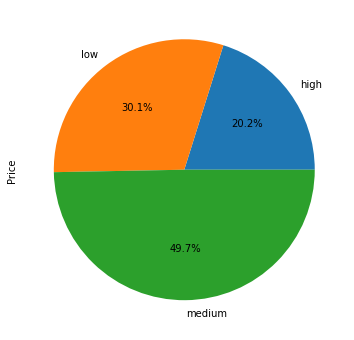

In [19]:
df_rating_user_place['general_score'].groupby(df_rating_user_place['price']).count().plot(
    kind="pie", ylabel='Price',figsize=(6,6), autopct='%1.1f%%');

In [20]:
df_rating_user_place[['general_score', 'price']].groupby('price').describe()

general_score                                             
               count      mean       std  min  25%  50%  75%  max
price                                                            
high           234.0  3.653846  2.224485  0.0  2.0  4.0  6.0  6.0
low            350.0  3.128571  2.032130  0.0  2.0  3.0  5.0  6.0
medium         577.0  3.674177  2.049198  0.0  3.0  4.0  6.0  6.0

### Restaurant closer to customer get higher rating

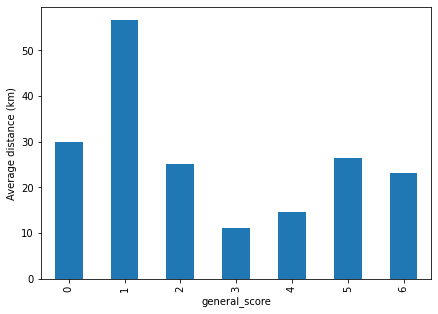

In [21]:
df_rating_user_place['distance_km'].groupby(df_rating_user_place['general_score']).mean().plot(
    kind='bar', ylabel='Average distance (km)',figsize=(7,5));

In [22]:
df_rating_user_place[['general_score_binary', 'distance_km']].groupby('general_score_binary').describe()

distance_km                                            \
                           count       mean        std       min       25%   
general_score_binary                                                         
0                          236.0  34.882425  99.186209  0.080878  1.061263   
1                          925.0  19.238197  76.221945  0.000000  0.925846   

                                                      
                           50%       75%         max  
general_score_binary                                  
0                     2.835957  5.324926  404.239622  
1                     2.118361  4.640753  410.335578

In [23]:
df_rating_user_place[['general_score', 'distance_km']].groupby('general_score').describe()

distance_km                                             \
                    count       mean         std       min       25%   
general_score                                                          
0                   193.0  30.015166   95.362534  0.080878  0.886223   
1                    43.0  56.728496  113.469418  0.083227  1.642543   
2                    89.0  25.075691   82.390400  0.060124  1.363515   
3                   223.0  11.088423   55.984375  0.080997  0.856741   
4                   178.0  14.529145   64.752961  0.060347  0.776162   
5                   142.0  26.398722   91.324298  0.144340  0.999455   
6                   293.0  23.058264   85.279973  0.000000  1.023639   

                                               
                    50%       75%         max  
general_score                                  
0              2.590840  4.366862  404.239622  
1              4.963304  9.314963  403.348557  
2              3.033980  6.277419  404.069115  
3              1.734116  3.951680  409.535725  
4              1.771476  4.151699  404.376046  
5              2.651053  4.961902  409.249655  
6              2.411633  4.847610  410.335578

### Customers with higher budget give higher rating

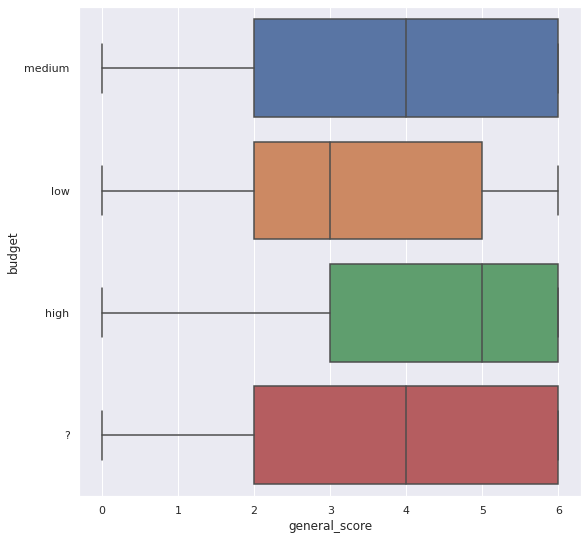

In [24]:
sns.set(rc={'figure.figsize':(9,9)})
sns.boxplot(x="general_score", y="budget", data=df_rating_user_place);

### No correlation between customer budget and restaurant price:
customers with all budget ranges go to variod price range restaurants

In [25]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult3=pd.crosstab(index=df_rating_user_place['price'],columns=df_rating_user_place['budget'])
print(CrosstabResult3)

budget   ?  high  low  medium
price                        
high    14     9   60     151
low     15    13   94     228
medium  40    20  162     355


In [26]:
# Performing Chi-sq test
ChiSqResult3 = chi2_contingency(CrosstabResult3)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult3[1])

The P-Value of the ChiSq Test is: 0.7353018372953393


In [27]:
## Map

In [28]:
# df_geo = df_rating_user_place[['place_lat', 'place_lon', 'user_lat', 'user_lon']]

[yc, xc] = [df_place['place_lat'].mean(), df_place['place_lon'].mean()]

[yc, xc]

[21.858863214615376, -100.34293302846157]

In [29]:
icon_create_function = """\
function(cluster) {
    return L.divIcon({
    html: '<b>' + cluster.getChildCount() + '</b>',
    className: 'marker-cluster marker-cluster-large',
    iconSize: new L.Point(30, 30),
    iconColor: 'black'
    });
}"""


callback = """\
function (row) {
    var icon, marker;
    icon = L.AwesomeMarkers.icon({
        icon: "map-marker", markerColor: "red"});
    marker = L.marker(new L.LatLng(row[0], row[1]));
    marker.setIcon(icon);
    marker.bindPopup('Restaurant: '+row[2]);
    return marker;
};
"""

In [30]:
#Creating folium map
map_pu = folium.Map(location=[yc, xc],
                      zoom_start=5, prefer_canvas= True, control_scale = True,
                      tiles='', 
                      attr='', name='') #World_Street_Map
# Adding basemaps

folium.TileLayer('OpenStreetMap').add_to(map_pu)
folium.TileLayer('cartodbpositron').add_to(map_pu)


# Adding layers

FastMarkerCluster(data=list(zip(df_place['place_lat'].values, df_place['place_lon'].values, df_place['placeID'].values.astype(str))), name='Restaurant', callback=callback).add_to(map_pu)

marker_cluster = MarkerCluster(
    name='User',
    overlay=True,
    control=True,
    icon_create_function=icon_create_function #None
)

for k in range(df_user['user_lat'].shape[0]):
    location = df_user['user_lat'][k], df_user['user_lon'][k]
    marker = folium.Marker(location=location)
    popup = 'Customer:{}<br>Budget:{}'.format(df_user['userID'][k], df_user['budget'][k])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)


marker_cluster.add_to(map_pu)


folium.LayerControl().add_to(map_pu)

#Save html
# map_leak.save('RioTinto_Rail_LX_v02.html')  # ---> in html file data:image need to replaced with path to png file

map_pu